In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import itertools
import seaborn as sns
import statsmodels.stats.weightstats as ssw
%matplotlib inline

In [24]:
norm_rv = sts.norm()
sample = norm_rv.rvs(100)
sample

array([-0.33798393, -0.49898851,  0.48507828, -0.90108699, -1.21941697,
        0.39073343,  2.16067025,  2.10095529,  0.84830144,  0.99641787,
        0.05506891,  0.31798932,  0.68001459, -0.08130663, -0.92569861,
       -1.55771847,  0.86238445,  0.42262472,  1.53276262,  0.17064295,
        1.07499723,  2.03021211,  0.19879616,  0.21375877,  0.81579928,
       -0.97341716,  0.01909891, -0.50497245,  1.2898694 ,  1.33358985,
        1.34035928, -0.03064564,  0.56401987,  1.12542825,  0.3349802 ,
        1.28396242,  0.67728505, -0.35484669, -1.36890159, -0.33593768,
        0.49289847, -0.21211144,  0.13468365, -0.12582566,  0.36702184,
       -0.29113418, -1.34772671, -0.12217634,  0.57788619, -0.51528556,
       -0.89978858, -0.07885948,  0.64738864, -0.08913782,  0.13459045,
       -1.2697692 ,  0.45895749,  0.50581342,  2.02842325, -0.2423506 ,
       -1.33663342, -0.09126418, -1.21679772,  1.09380703,  1.8460668 ,
       -1.09529707, -0.03804311, -0.99491625,  0.51340545,  1.14

In [25]:
sample.dtype

dtype('float64')

In [26]:
real_mean = norm_rv.mean() # настоящее среднее случайной величины
real_mean

0.0

In [27]:
real_var = norm_rv.var()  # настоящая дисперсия случайной величины
real_var

1.0

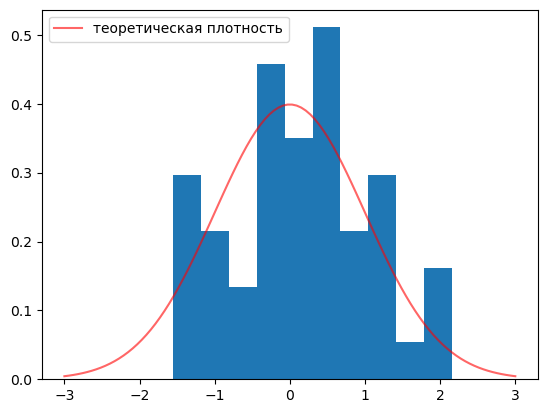

In [30]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-3,3,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.6, color='red')
plt.legend()

In [31]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.16958521477911948
0.8293536323060199


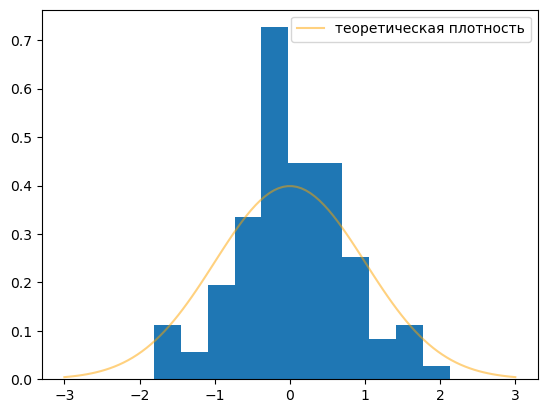

In [34]:
p=.1
norm_rv = sts.norm(p)
norm_rv.rvs(20)
N = 2
NN = 100

# сгенерируем 100 выборочных средних
means = []
for i in range(NN):
    means.append(np.mean(norm_rv.rvs(N)))
plt.hist(means, density=True, bins='auto');
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5, color='orange')
plt.legend()

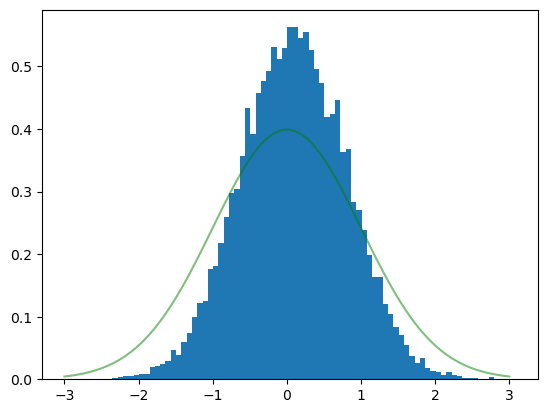

In [35]:
p=.1
norm_rv = sts.norm(p)
norm_rv.rvs(20)
N = 2
NN = 20000

# сгенерируем 20 000 выборочных средних
means = []
for i in range(NN):
    means.append(np.mean(norm_rv.rvs(N)))
plt.hist(means, density=True, bins='auto');
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5, color='green')

In [39]:
df=pd.read_csv('telecom_churn.csv')
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [40]:
df.shape

(3333, 21)

In [41]:
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [ ]:
#Делаем вывод, что чем больше размер нашей выборки, тем точнее получаем распределение.

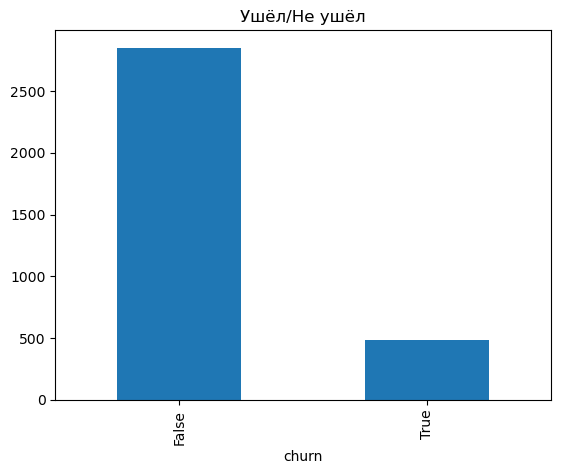

In [42]:
df['churn'].value_counts().plot(kind='bar')
plt.title('Ушёл/Не ушёл');

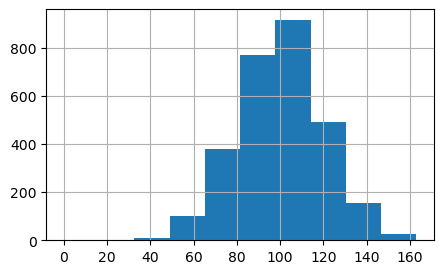

In [43]:
df.query('churn==False')['total day calls'].hist(figsize=(5,3));

In [44]:
len(df.query('churn==False')['total day calls'])

2850

In [47]:
data = df.query('churn==False')['total day calls']\
         .sort_values()\
         .reset_index(drop= True)

#Стандартное отклонение:
sto=np.std(data,ddof=1)

#Среднее значение:
loc=np.mean(data)

scale=(np.std(data, ddof=1)/np.sqrt(len(data)-1))

print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    loc - 1.96 * sto / np.sqrt(len(data)-1), loc + 1.96 * sto / np.sqrt(len(data)-1) 
))

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(loc,  sto, alpha=0.95, alternative='two-sided')
))    

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [99.5560474002651, 101.01026838920859] 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.04149114274121, 101.52482464673248) 


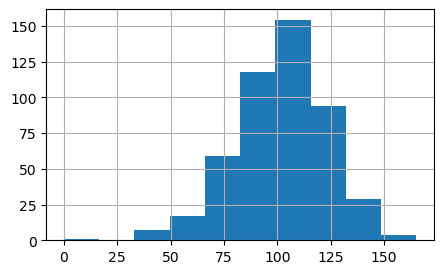

In [48]:
df.query('churn==True')['total day calls'].hist(figsize=(5,3));

In [49]:
data = df.query('churn==True')['total day calls']\
         .sort_values()\
         .reset_index(drop= True)

#Стандартное отклонение:
sto=np.std(data,ddof=1)

#Среднее значение:
loc=np.mean(data)

print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    loc - 1.96 * sto/ np.sqrt(len(data)-1), loc + 1.96 * sto/ np.sqrt(len(data)-1) 
))

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(loc,  sto, alpha=0.95, alternative='two-sided')
))   

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [99.40863130099714, 103.26217615241902] 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 


In [ ]:
#1.Результат построение доверительного интервала методом _zconfint_generic менее точный, чем результат с известной дисперсией.
#2.На менее объёмной выборке результат построение доверительного интервала методом _zconfint_generic более точный.